## 3. Planetary orbits

The gravitational force felt by an object (planet, satellite, star, etc.) of mass $m_1$ at position $r_1$  due to another of mass $m_2$ at $r_2$ is given by

$$\mathbf{F} = - \frac{G m_1 m_2}{|\mathbf{r_1} - \mathbf{r_2}|^3} \mathbf{r}$$

The equations of motion for the first object can then be written:

$$ \frac{\mathrm{d}^2 x_1}{\mathrm{d} t^2} = - \frac{G m_2}{|\mathbf{r_1} - \mathbf{r_2}|^3} x_1 $$
$$ \frac{\mathrm{d}^2 y_1}{\mathrm{d} t^2} = - \frac{G m_2}{|\mathbf{r_1} - \mathbf{r_2}|^3} y_1 $$

In what follows, we will express time in years, distances in AU (astronomical unit $\sim$ Earth-Sun distance), masses in terms of the solar mass ($M_S$) and use $G \approx 4 \pi^2$ to simplify calculations.


Revisit the ODE notebook from Lecture 4 -- here we examined how a 2nd order differential equation (the harmonic oscillator) could be solved using scipy.integration.odeint by splitting it into two coupled first order equations.

Use this as a basis to solve the differential equations above.

### Exercise 1
For the first case, we look at the case of the earth and the sun.

Take $m_1 = 3\times10^{-6}$ and $m_2 =1.0$.

Further assume that the sun remains fixed at the origin -- i.e. $\mathbf{r_2}(t) = \mathbf{0}$.

Use initial conditions $\mathbf{r}(t=0) = (1,0)$ and $\mathbf{v}(t=0) = (0, 2\pi)$.


a) Write the system of 4 coupled differential equations describing the system.

b) Write a function evaluating each of the first derivative terms, and which can be passed to odeint to integrate this system of ODEs.

c) Calculate the orbit trajectory by integrating the system of ODEs with a suitable time step.

d) Plot and compare a few orbit with different initial velocities



_answer to a)_

$$ \frac{\mathrm{d} x_1}{\mathrm{d} t} (t)= v_{x1} (t) $$

$$ \frac{\mathrm{d} y_1}{\mathrm{d} t} (t) = v_{y1} (t) $$

$$ \frac{\mathrm{d} v_{x1}}{\mathrm{d} t} (t) = - \frac{G m_2}{|\mathbf{r_1} - \mathbf{r_2}|^3} x_1 (t)  $$

$$ \frac{\mathrm{d} v_{y1}}{\mathrm{d} t} (t) = - \frac{G m_2}{|\mathbf{r_1} - \mathbf{r_2}|^3} y_1 (t) $$


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
#%matplotlib notebook    #-- uncomment if you want to use animations (best to copy the notebook for this!)

In [4]:
# y contains (x1, y1, vx1, vy1)

def dydt(y, t, m2):
    output = np.zeros_like(y)
    output[0]=y[2]
    output[1]=y[3]
    output[2]= - 4*np.pi**2 *m2 * y[0] / (np.sqrt(y[0]**2 + y[1]**2))**3
    output[3]= - 4*np.pi**2 *m2 * y[1] / (np.sqrt(y[0]**2 + y[1]**2))**3
    return output         

In [8]:
#initial conditions
y0 = np.array((1, 0, 0*np.pi, 2.0*np.pi))     

#range of times
t=np.linspace(0,50,5000)

#run ODE solver for earth-like initial conditions
earthdata = odeint(dydt, y0, t, args=(1.0,)).T   # FUNCTION , inital condtions , time range , any other arguments needed by the function (this case u need mass of m2) 

In [9]:
#other possible starting values of vx
otherstarting = [0.75, 1.0, 2.5, 3.0]
otherdata = []

#generate data for the other cases also
for const in otherstarting:
    y0a = np.array((1, 0, 0*np.pi, const*np.pi)) 
    temp = odeint(dydt, y0a, t, args=(1.0,)).T
    otherdata.append(temp)

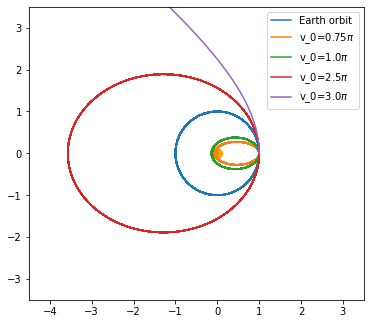

In [10]:
fig, ax = plt.subplots(figsize=(6,6))
ax.set_aspect('equal')
ax.plot(0, 0, 'o', ms=10, color='orange')
ax.plot(earthdata[0], earthdata[1], label="Earth orbit")

for i, const in enumerate(otherstarting):
    ax.plot(otherdata[i][0], otherdata[i][1], label='v_0='+str(const)+r'$\pi$')
ax.set_xlim(-4.5, 3.5)
ax.set_ylim(-3.5, 3.5)
ax.legend()
plt.show()